In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.utils import resample


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import xgboost
from xgboost import XGBClassifier

from ctr_function import Model_Test, get_train_test, Model_Test1, Model_Test2


from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [ ]:
# ctr_com = pd.read_csv("data/ctr_ad_user.csv")

In [25]:
ctr = pd.read_csv("data/test/ctr_ad_user_test_ready.csv")

In [27]:
ctr.describe()

,Unnamed: 0,user,time_stamp,adgroup_id,nonclk,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
count,3.270320e+06,3.270320e+06,3.270320e+06,3.270320e+06,3.270320e+06,3.270320e+06,3.270320e+06,3.270320e+06,3.270320e+06,2.265438e+06,3.270320e+06,3.072139e+06,3.072139e+06,3.072139e+06,3.072139e+06,1.469546e+06,3.072139e+06,3.072139e+06,2.243598e+06
mean,1.296932e+07,5.675245e+05,1.494053e+09,4.909300e+05,9.479161e-01,5.208389e-02,5.303881e+03,2.100585e+05,1.106935e+05,2.251102e+05,7.011197e+02,1.490680e+01,5.062081e+00,1.723383e+00,3.403281e+00,1.737026e+00,2.806153e+00,5.202043e-02,2.548588e+00
std,7.605023e+06,3.294553e+05,2.188024e+04,2.069741e+05,2.221963e-01,2.221963e-01,2.385624e+03,1.246613e+05,7.431768e+04,1.306118e+05,1.221345e+05,2.449921e+01,3.069567e+00,4.473257e-01,1.196512e+00,5.878582e-01,4.963800e-01,2.220683e-01,9.239319e-01
min,9.000000e+00,4.000000e+00,1.494000e+09,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,6.059128e+06,2.829970e+05,1.494038e+09,3.473200e+05,1.000000e+00,0.000000e+00,4.282000e+03,1.027250e+05,4.429100e+04,1.066650e+05,8.200000e+01,0.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00
50%,1.297674e+07,5.637560e+05,1.494055e+09,5.410530e+05,1.000000e+00,0.000000e+00,5.869000e+03,2.060590e+05,1.044060e+05,2.254230e+05,1.590000e+02,0.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00
75%,1.983432e+07,8.513120e+05,1.494073e+09,6.553900e+05,1.000000e+00,0.000000e+00,6.426000e+03,3.218500e+05,1.687290e+05,3.373650e+05,3.190000e+02,2.000000e+01,8.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00
max,2.655796e+07,1.141726e+06,1.494086e+09,8.468110e+05,1.000000e+00,1.000000e+00,1.296000e+04,4.234350e+05,2.558210e+05,4.613210e+05,1.000000e+08,9.600000e+01,1.200000e+01,2.000000e+00,6.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00


In [46]:
#binning price to add as feature
ctr['price_0'] = ctr.apply(lambda row: 1 if row.price <= 1 else 0, axis = 1)
ctr['price_1'] = ctr.apply(lambda row: 1 if 1.0 < row.price <= 1.5 else 0, axis = 1)
ctr['price_2'] = ctr.apply(lambda row: 1 if 1.5 < row.price <= 2.0 else 0, axis = 1)
ctr['price_3'] = ctr.apply(lambda row: 1 if 2.0 < row.price <= 2.5 else 0, axis = 1)
ctr['price_4'] = ctr.apply(lambda row: 1 if 2.5 < row.price <= 3.0 else 0, axis = 1)
ctr['price_5'] = ctr.apply(lambda row: 1 if 3.0 < row.price <= 3.5 else 0, axis = 1)
ctr['price_6'] = ctr.apply(lambda row: 1 if 3.5 < row.price <= 4.0 else 0, axis = 1)
ctr['price_7'] = ctr.apply(lambda row: 1 if row.price >4.0 else 0, axis = 1)

In [5]:
# Except for feature 'price', fill in all missing value as a new category 'unknow'
# ctr.fillna(value= 'Unknow', inplace=True)

In [32]:
fea_list = ['pid','cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'occupation',
       'new_user_class_level ', 'cms_segid']

### Logistic regression

In [109]:
# without feature price
# lr = LogisticRegression(class_weight='balanced')
# Model_Test(ctr,'clk', lr, fea_list, test_size = 0.3)

In [110]:
#Logistic Regression with price
# lr = LogisticRegression(class_weight='balanced')
# Model_Test(ctr,'clk', lr, fea_list, test_size = 0.3)

In [111]:
#Logistic Regression with price
lr = LogisticRegression(class_weight={0: 1, 1: 10})
Model_Test(ctr,'clk', lr, fea_list, test_size = 0.3)

In [112]:
#Logistic Regression with resample
lr = LogisticRegression(class_weight='balanced')
Model_Test1(ctr,'clk', lr, fea_list, test_size = 0.3)

In [113]:
#Logistic Regression with SMOTE
lr = LogisticRegression(class_weight='balanced')
Model_Test2(ctr,'clk', lr, fea_list, test_size = 0.3)

### Random Forest

In [101]:
#Random Forest without price
rf = RandomForestClassifier()
Model_Test(ctr,'clk', rf, fea_list, test_size = 0.3)

In [102]:
#Random Forest with price
rf = RandomForestClassifier()
Model_Test1(ctr,'clk', rf, fea_list, test_size = 0.3)

In [103]:
#Random Forest with SMOTE
rf = RandomForestClassifier()
Model_Test2(ctr,'clk', rf, fea_list, test_size = 0.3)

In [30]:
# Downsampling

# keep all positive examples, keep 1/10 negative examples
mask = ctr['clk'].apply(lambda c: c>0 or random.random() > 0.9)
ctr2 = ctr[mask]
ctr2.shape

(480274, 21)

In [42]:
df = ctr2[fea_list]

/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
# df = pd.get_dummies(ctr2[fea_list].astype(str))

df.describe()

,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,cms_segid,price
count,450829.000000,450829.000000,450829.000000,215097.000000,450829.000000,450829.000000,328412.000000,450829.000000,4.802740e+05
mean,5.030608,1.728474,3.402341,1.733371,2.803859,0.052479,2.548862,14.757509,5.415803e+02
std,3.063450,0.444747,1.204615,0.586850,0.499772,0.222991,0.924530,24.367054,1.856645e+04
min,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000e-02
25%,3.000000,1.000000,3.000000,1.000000,3.000000,0.000000,2.000000,0.000000,7.900000e+01
50%,4.000000,2.000000,3.000000,2.000000,3.000000,0.000000,2.000000,0.000000,1.580000e+02
75%,8.000000,2.000000,4.000000,2.000000,3.000000,0.000000,3.000000,20.000000,3.160000e+02
max,12.000000,2.000000,6.000000,3.000000,3.000000,1.000000,4.000000,96.000000,9.600000e+06


### Gradient boosting

In [49]:
#check with SMOTE
xgb = XGBClassifier()
Model_Test2(ctr,'clk', xgb, fea_list, test_size = 0.3)

### More exploration to improve

In [45]:
model = XGBClassifier()

In [46]:
model.fit(df, ctr2['clk'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
df['proba'] = model.predict_proba(df)[:, 1]


/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
roc_auc_score(ctr2['clk'], df['proba'])

0.5409393248640584

In [18]:
all_log_loss = log_loss(y_train, y_train_pred[:, 1])
x_train

In [ ]:
# Model_Test(ctr, 'clk', xgb, fea_list, test_size = 0.3)

See the change in train auc and test auc for overfitting/underfitting
train auc 0.6694576309720327
test auc 0.5286451160168847
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    930123
           1       0.10      0.00      0.00     50973

    accuracy                           0.95    981096
   macro avg       0.52      0.50      0.49    981096
weighted avg       0.90      0.95      0.92    981096



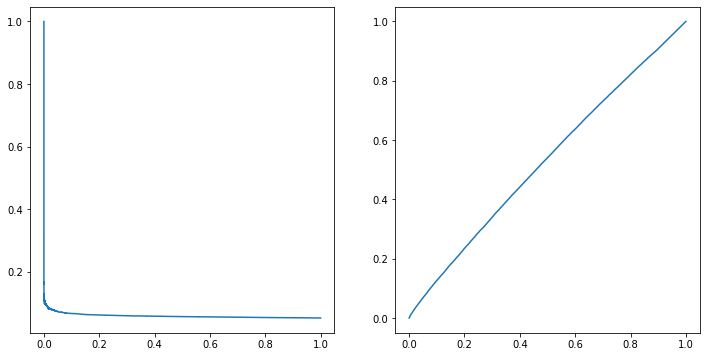

In [83]:
fea_list = ['pid','cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'occupation',
       'new_user_class_level ', 
            # these features may not be useful.
            # 'hour', 'cms_segid', 
           ]

for fea in fea_list:
     ctr[fea] = ctr[fea].astype(str)


In [84]:
ctr[fea_list].nunique()

pid                       2
cms_group_id             14
final_gender_code         3
age_level                 8
pvalue_level              4
shopping_level            4
occupation                3
new_user_class_level      5
dtype: int64

In [85]:
ctr2 = pd.get_dummies(ctr[fea_list])

In [87]:
x_train, x_test, y_train, y_test = train_test_split(ctr2, ctr['clk'], test_size = 0.3)

In [112]:
# random forest
#model = RandomForestClassifier(n_estimators=100)


model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=10, silent=False)

model.fit(x_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=1, verbosity=1)

In [57]:
# y_train_pred = model.predict_proba(x_train)
# np.histogram(y_train_pred[:, 1], bins=20)
# np.histogram(y_test_pred[:, 1], bins=20)
# print('test auc', roc_auc_score(y_test, y_test_pred[:, 1]))

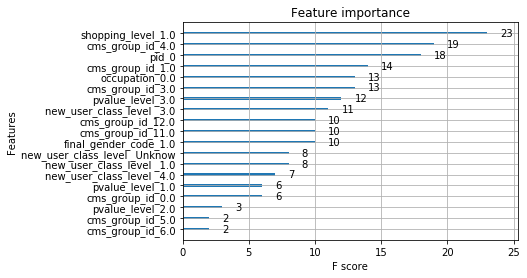

In [123]:
# for random forest
# feat_scores = pd.DataFrame({'Fraction of Samples Affected' : dt.feature_importances_},
#                            index=x_train.columns)
# feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected', ascending=False)
# feat_scores[:50].plot(kind='barh', figsize=(18,18))

# for xgboost
xgboost.plot_importance(model)
#xgboost.to_graphviz(model, num_trees=1)


# Try sparse function

In [94]:
!python3 ctr_sparse.py

/Users/elainewu/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Click-through rate models training started...

Decision Tree
✔  Decision tree model training complete..."		111.1s
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     94956
           1       0.05      0.00      0.01      5044

    accuracy                           0.95    100000
   macro avg       0.50      0.50      0.49    100000
weighted avg       0.90      0.95      0.92    100000

✔  ROC AUC score on test set: 0.505
✔  Decision tree model saved...


✔  Done


In [95]:
!python3 ctr_sparse.py

/Users/elainewu/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Click-through rate models training started...

Decision Tree
✔  Decision tree model training complete..."		3632.4s
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     95555
           1       0.00      0.00      0.00      4445

    accuracy                           0.96    100000
   macro avg       0.48      0.50      0.49    100000
weighted avg       0.91      0.96      0.93    100000

✔  ROC AUC score on test set: 0.534
✔  Decision tree model saved...


✔  Done


In [100]:
!python3 ctr_sparse.py

/Users/elainewu/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Click-through rate models training started...

Decision Tree
*  Decision tree model training started...
✔  Decision tree model training complete..."		107.5s
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     94956
           1       0.06      0.00      0.01      5044

    accuracy                           0.95    100000
   macro avg       0.51      0.50      0.49    100000
weighted avg       0.90      0.95      0.92    100000

✔  ROC AUC score on test set: 0.504
✔  Decision t

# Model Function

In [52]:
# model types
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), XGBClassifier()]

#  LR
c = [np.logspace(1000, 4000, 10)]
penalty = ['l1', 'l2']

param_LR = {'C' : c,
               'penalty': penalty}

#  RF
criterion = ['gini','entropy']
estimators = [100, 200, 500, 1000]

param_RF = {'criterion' : criterion,
                #'max_depth' : depth_parm,
                'n_estimators' : estimators}

# GBR
estimators = [100, 500, 1000]
learning_rate = [0.1, 0.01, 0.001]

param_GBR = {'n_estimators' : estimators,
                 'learning_rate' : learning_rate}


# XGBR
estimators = [100, 500, 1000]
learning_rate = [0.1, 0.01, 0.001]

param_XGB = {'n_estimators' : estimators,
                 'learning_rate' : learning_rate}

parameters = [param_LR, param_RF, param_GBR, param_XGB]

In [53]:
scorer = make_scorer(log_loss,
                     greater_is_better=False,
                     needs_proba=True)

In [54]:
def run_comparison2(name, X_train, y_train, X_test, y_test, models, parameters = None, scorer = None, zoom = None):
#     plt.figure(figsize=(18,10))
    fig, axs = plt.subplots(1, 2, figsize = (18, 10))
    scores = {}
    accuracies = {}
    
    for i,model in enumerate(models):
        
        if parameters is not None:
            grid = GridSearchCV(model,
                           parameters[i],
                           cv=5,
                           scoring=scorer)
        else:
            grid = model

        grid.fit(X_train,y_train)
        
        score = -grid.score(X_test, y_test)
        accuracy = (grid.predict(X_test) == y_test).mean()    
        
        scores[model] = score
        accuracies[model] = accuracy
        
        probabilities = grid.predict_proba(X_test)
        
        if model == LogisticRegression():
            print(model.__class__.__name__)
            print(grid.coef_)
            print(grid.intercept_)
#         print(probabilities[:,1])
        

        tpr, fpr, thresholds = roc_curve(y_test, probabilities[:,1])
        
        axs[0].plot(tpr, fpr, lw = 3, label = model.__class__.__name__)
        
        p, r, _ = precision_recall_curve(y_test, probabilities[:, 1])

        axs[1].plot(r, p, lw = 3, label = model.__class__.__name__)

#         plt.plot(fpr, tpr, lw = 3, label = model.__class__.__name__)

        
    x = np.linspace(0,1,100)
    axs[0].plot(x,x, ls = '--', lw = 2, alpha = 0.9, color = 'grey')
    axs[0].set_xlabel("False Positive Rate", size = 15)
    axs[0].set_ylabel("True Positive Rate", size = 15)
    axs[0].set_title("ROC plot - Comparison of models (" + name + ')', size = 20)
    axs[0].legend(prop={'size' : 10})
    
    axs[1].plot(x,x, ls = '--', lw = 2, alpha = 0.9, color = 'grey')
    axs[1].set_xlabel("Recall Rate", size = 15)
    axs[1].set_ylabel("Precision Rate", size = 15)
    axs[1].set_title("Precision Recall plot - Comparison of models (" + name + ')', size = 20)
    axs[1].legend(prop={'size' : 10})
    
    
#     if zoom is not None:
#         plt.xlim((0.5,1))
#         plt.savefig('roc_' + name + '_zoom.png')
#     else:
#         plt.savefig('roc_' + name + '.png')
    
#     plt.show()
    
    return scores, accuracies

In [56]:
x_train, x_test, y_train, y_test = get_train_test(ctr,'clk', fea_list, test_size = 0.3)

TypeError: cannot unpack non-iterable NoneType object